In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as opt
import pyswarms

from scipy.optimize import differential_evolution

In [2]:
def f(x):
    return 1 / (x**2 - 3*x + 2)

__x = np.array([3*k/1000 for k in range(1001)])
__y_denoised = np.clip(f(__x), -100, 100)
__y = __y_denoised + np.random.standard_normal(size=__x.shape)

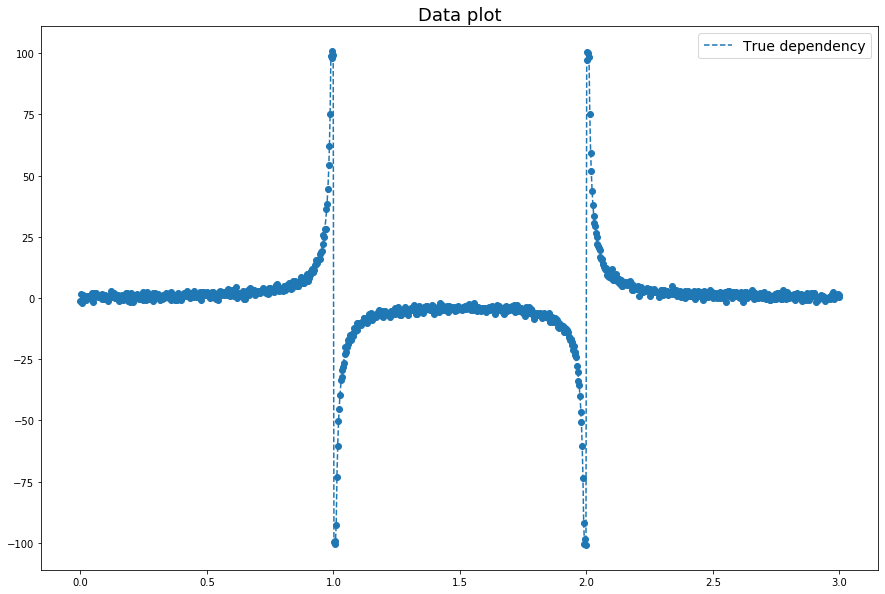

In [33]:
plt.figure(figsize=(15, 10))
plt.title('Data plot', fontsize=18)
plt.scatter(__x, __y)
plt.plot(__x, __y_denoised, ls='--', label='True dependency')
plt.legend(fontsize=14)
plt.savefig('data4.png')

In [4]:
def vectorize(f):
    def wrapper(p):
        try:
            a, b, c, d = p
        except ValueError:
            return [f(a, b, c, d) for a, b, c, d in p]
        return f(a, b, c, d)
    return wrapper

In [5]:
def F(x, a, b, c, d):
    return (a*x + b) / (x**2 + c*x + d)

@vectorize
def loss(a, b, c, d):
    return np.sum((F(__x, a, b, c, d) - __y)**2)

In [6]:
def levenberg_marquardt(f, X, Y, x_0, eps):
    fun = lambda p: f(X, *p) - Y
    res = opt.least_squares(fun, x_0, xtol=eps)
    return res.x, res.cost, res.njev

In [7]:
def nelder_mead(f, x_0, eps):
    r = opt.minimize(f, method='Nelder-Mead', x0=x_0, tol=eps)
    return r.x, r.fun, r.nit

In [8]:
def particle_swarm(f, eps):
    options = {'c1': 0.5, 'c2': 0.2, 'w': 0.9}
    optimizer = pyswarms.single.GlobalBestPSO(n_particles=50, dimensions=4, options=options)
    cost, pos = optimizer.optimize(f, iters=1000)
    return pos, cost, 1000

In [28]:
def diff_evolution(f, eps):
    r = differential_evolution(f, [(-10, 10)]*4, maxiter=1000)
    return r.x, r.fun, r.nit

In [31]:
results = []
results.append((nelder_mead(loss, np.array([0, 1, -2, 1]), 1e-2), 'Nelder-Mead'))
results.append((levenberg_marquardt(F, __x, __y, np.array([0, 1, -2, 1]), 1e-2), 'Levenberg-Marquardt'))
results.append((particle_swarm(loss, 1e-2), 'Particle swarm'))
results.append((diff_evolution(loss, 1e-2), 'Differential evolution'))

2020-09-28 17:37:00,712 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.2, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=1.61e+5
2020-09-28 17:37:04,217 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 161410.00025277789, best pos: [-1.73025189  1.72911947 -1.99735082  0.99743208]


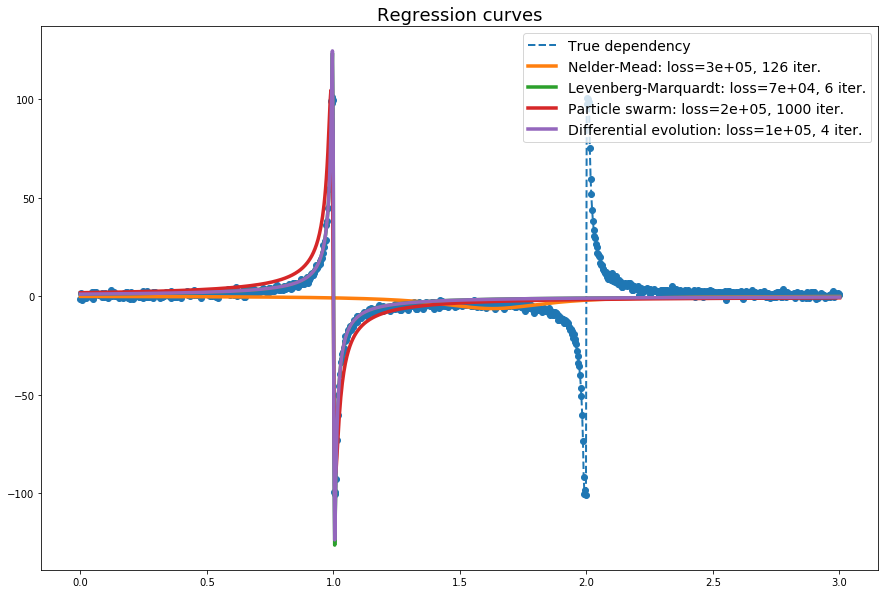

In [34]:
plt.figure(figsize=(15, 10))
plt.title('Regression curves', fontsize=18)
plt.scatter(__x, __y)
plt.plot(__x, __y_denoised, label='True dependency', lw=2, ls='--')
for res, method in results:
    plt.plot(__x, F(__x, *res[0]), lw=3.5, label=f"{method}: loss={res[1]:.1}, {res[2]} iter.")
plt.legend(fontsize=14)
plt.savefig('approx4.png')